In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("/content/winequalityN.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [6]:
df['type'] = df['type'].map({'white':1,'red':0})

In [7]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
final_df = df

In [9]:
cols  = final_df.columns.tolist()

def right_nor_left(df, col):
    
    rs = final_df[value].skew()

    if rs > 0:
        return "positive (+ve) skewed"
    
    elif rs == 0:
        return "normal skewed"
    
    elif rs < 0:
        return "negative (-ve) skewed"

for value in cols:
    
    print(value, "->",right_nor_left(final_df,value))

type -> negative (-ve) skewed
fixed acidity -> positive (+ve) skewed
volatile acidity -> positive (+ve) skewed
citric acid -> positive (+ve) skewed
residual sugar -> positive (+ve) skewed
chlorides -> positive (+ve) skewed
free sulfur dioxide -> positive (+ve) skewed
total sulfur dioxide -> negative (-ve) skewed
density -> positive (+ve) skewed
pH -> positive (+ve) skewed
sulphates -> positive (+ve) skewed
alcohol -> positive (+ve) skewed
quality -> positive (+ve) skewed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

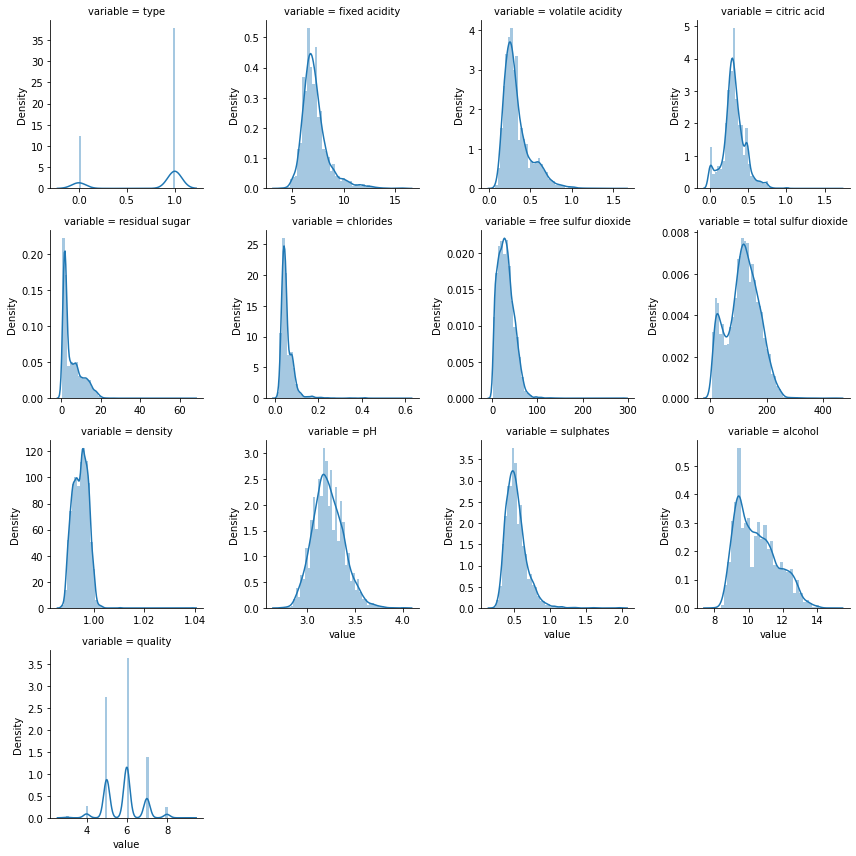

In [10]:
import seaborn as sns
num = [f for f in final_df.columns if final_df.dtypes[f] != 'object']
nd = pd.melt(final_df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

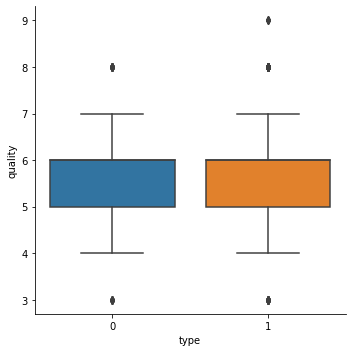

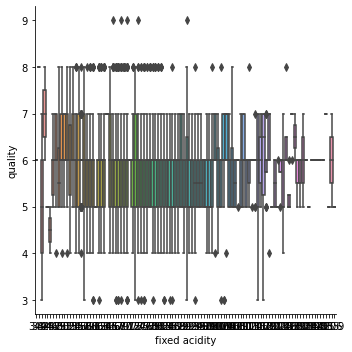

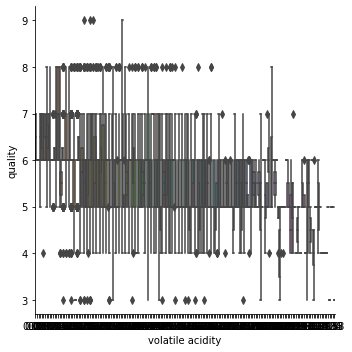

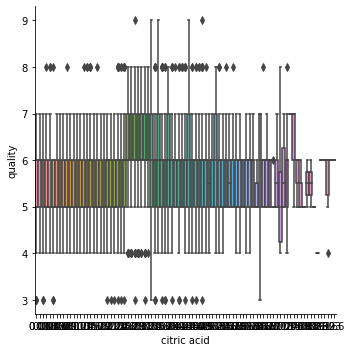

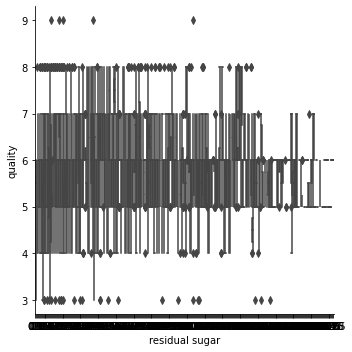

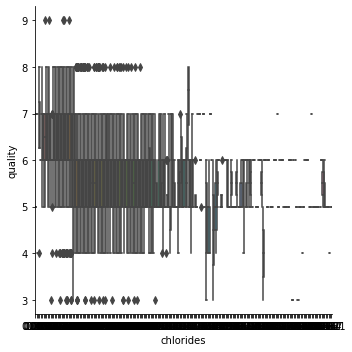

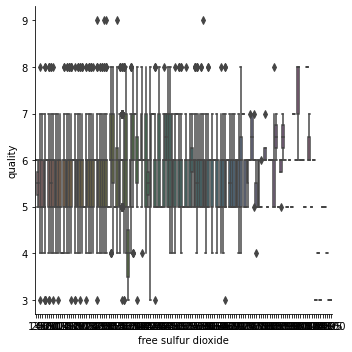

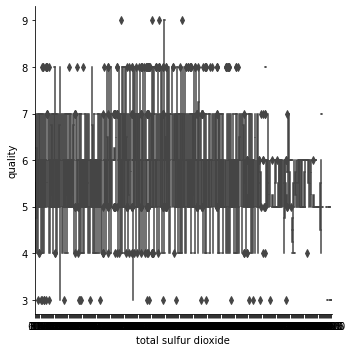

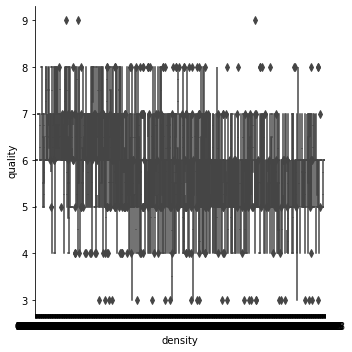

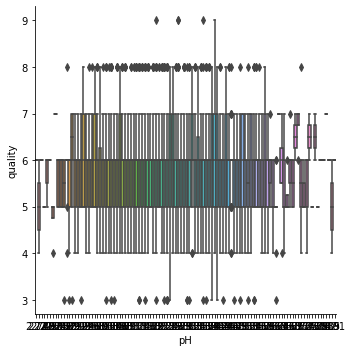

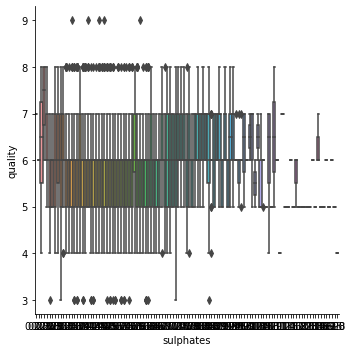

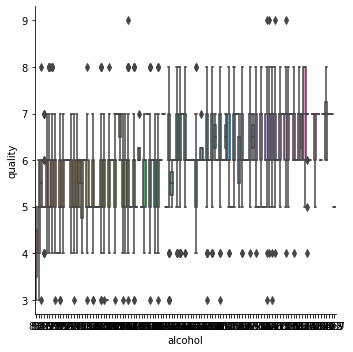

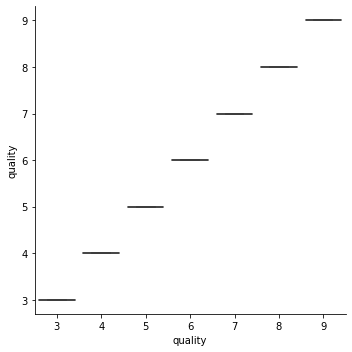

In [12]:
import matplotlib.pyplot as plt

for value in cols:
    sns.catplot(data=final_df, x=value, y='quality', kind="box")
    plt.show()    


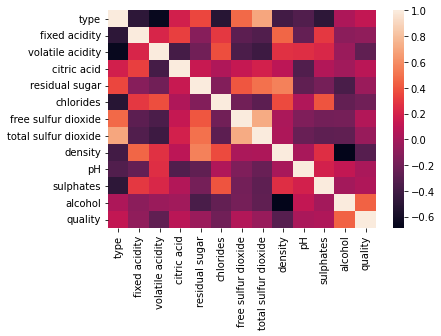

In [13]:
corr = final_df.corr()
sns.heatmap(corr)
plt.show()

In [14]:
corr

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,-0.487241,-0.652875,0.187126,0.349000,-0.512622,0.471644,0.700357,-0.390645,-0.328727,-0.486916,0.032970,0.119323
fixed acidity,-0.487241,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,-0.652875,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.187126,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,0.349000,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,-0.512622,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,0.471644,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,0.700357,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,-0.390645,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.328727,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366


In [15]:
X = final_df.drop(['quality'], axis=1)
y = final_df['quality']

In [20]:
X.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
dtype: int64

In [21]:
X = X.fillna(value=0)
X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.00,11.2
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [24]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.4702
Test set score: 0.4744


In [25]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_train, y_train)

In [26]:
print('Training set score: {:.2f}'.format(tree.score(X_train, y_train)))

print('Test set score: {:.2f}'.format(tree.score(X_test, y_test)))

Training set score: 1.00
Test set score: 0.61


In [27]:
print(X_train.shape , y_train.shape) # training dataset

print(X_test.shape ,y_test.shape) # testing dataset 

(4547, 12) (4547,)
(1950, 12) (1950,)


In [34]:
prediction = clf.predict(X_test)
prediction1 = tree.predict(X_test)

In [35]:
prediction, y_test, prediction1

(array([6, 6, 6, ..., 6, 6, 6]), 3103    7
 1419    7
 4761    6
 4690    6
 4032    5
        ..
 4294    5
 3757    5
 5954    7
 4418    6
 6182    5
 Name: quality, Length: 1950, dtype: int64, array([7, 6, 6, ..., 7, 6, 6]))

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, prediction)

0.7753846153846153

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, prediction)*100
r2_score(y_test, prediction1)*100


3.9906729783259043

In [39]:
from sklearn.metrics import accuracy_score
print("Accuracy in logistic regression:",accuracy_score(y_test, prediction))
print("Accuracy in decision tree:",accuracy_score(y_test, prediction1))


Accuracy: 0.47435897435897434
Accuracy: 0.6143589743589744
